In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [118]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pyod.models
import pickle
import sklearn

In [3]:
with open('/raid/mpsych/datasetA.pkl','rb') as f:
    datasetA_X = pickle.load(f)
    
with open('/raid/mpsych/datasetA_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [14]:
all_images = []
for a in datasetA_X:
    all_images.append(a.pixels)

In [16]:
import mahotas as mh

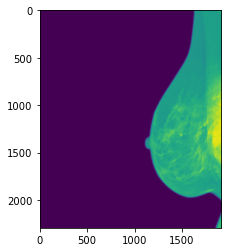

In [19]:
imshow(all_images[0])

In [151]:
SIGMA = 20

In [152]:
filtered = []
histograms = []
for i in all_images:
    f = mh.gaussian_filter(i ,sigma=SIGMA)
    f /= f.max()
    filtered.append(f)
    f *= 255
    histograms.append(mh.fullhistogram(f.astype(np.uint8)))

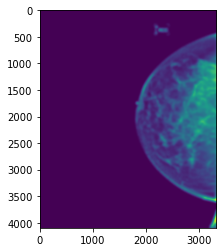

In [154]:
imshow(f)

In [155]:
histograms[0:3]

[array([3145750,   16160,   10108,    7546,    6080,    5116,    4501,
           3964,    3589,    3314,    3038,    2847,    2637,    2488,
           2383,    2270,    2159,    2020,    2014,    1911,    1832,
           1797,    1737,    1661,    1623,    1575,    1585,    1477,
           1500,    1426,    1415,    1370,    1385,    1316,    1317,
           1293,    1275,    1256,    1230,    1177,    1233,    1177,
           1170,    1174,    1111,    1146,    1106,    1103,    1126,
           1055,    1089,    1049,    1061,    1073,    1033,    1047,
           1017,    1026,    1009,    1023,    1001,    1000,     996,
           1002,     955,    1009,     990,     948,     975,     989,
            957,     979,     967,     942,     989,     960,     940,
            983,     934,     992,     955,     963,     966,     963,
            929,    1001,     961,     991,     951,     961,    1004,
            967,     983,    1013,     962,    1024,    1011,     990,
      

In [144]:
raveled = []
for f in filtered:
    raveled.append(f.ravel())
    
FEATURE_VEC = raveled

In [156]:
FEATURE_VEC = histograms

In [157]:
len(FEATURE_VEC)

100

In [158]:
FEATURE_VEC[0].shape

(256,)

In [159]:
od = O.OutlierDetector(0)
models = O.OutlierDetector._init_base_detectors(od.algorithms)

In [165]:
all_evals = {}

for m in models:
    a_name =  m.__class__.__name__
    print('running', a_name)
    try:
        clf = m
        clf.fit(FEATURE_VEC)

        y_train_scores = clf.decision_scores_
        pred_labels = clf.labels_

        eval = O.OutlierDetectorLite.evaluate(labels, pred_labels)

#         print('*'*10, eval['tp'])
        all_evals[a_name] = eval
    except:
        all_evals[a_name] = -1
        print(a_name, 'failed')
        continue
# y_test_scores = clf.decision_function(X_test)

running AutoEncoder
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_62 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_301 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_63 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_302 (Dense)            (None, 64)                16448     
_________________________________________________________________
dropout_64 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_303 (Dense)            (Non

Epoch 62/100
3/3 [==============================] - 0s 14ms/step - loss: 1.7446 - val_loss: 12.2832
Epoch 63/100
3/3 [==============================] - 0s 13ms/step - loss: 1.7367 - val_loss: 12.2394
Epoch 64/100
3/3 [==============================] - 0s 15ms/step - loss: 1.7253 - val_loss: 12.1857
Epoch 65/100
3/3 [==============================] - 0s 19ms/step - loss: 1.6988 - val_loss: 12.1701
Epoch 66/100
3/3 [==============================] - 0s 32ms/step - loss: 1.6877 - val_loss: 12.1442
Epoch 67/100
3/3 [==============================] - 0s 14ms/step - loss: 1.6806 - val_loss: 12.1071
Epoch 68/100
3/3 [==============================] - 0s 17ms/step - loss: 1.6641 - val_loss: 12.0876
Epoch 69/100
3/3 [==============================] - 0s 14ms/step - loss: 1.6721 - val_loss: 12.0764
Epoch 70/100
3/3 [==============================] - 0s 15ms/step - loss: 1.6458 - val_loss: 12.0915
Epoch 71/100
3/3 [==============================] - 0s 15ms/step - loss: 1.6420 - val_loss: 12.0877


Model: "model_233"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 256)]        0                                            
__________________________________________________________________________________________________
model_231 (Functional)          [(None, 2), (None, 2 109156      input_22[0][0]                   
__________________________________________________________________________________________________
model_232 (Functional)          (None, 256)          43558       model_231[0][2]                  
__________________________________________________________________________________________________
dense_307 (Dense)               (None, 256)          65792       input_22[0][0]                   
__________________________________________________________________________________________

3/3 [==============================] - 0s 14ms/step - loss: 260.9049 - val_loss: 286.5620
Epoch 15/100
3/3 [==============================] - 0s 13ms/step - loss: 251.7604 - val_loss: 284.7379
Epoch 16/100
3/3 [==============================] - 0s 14ms/step - loss: 256.7747 - val_loss: 290.2576
Epoch 17/100
3/3 [==============================] - 0s 15ms/step - loss: 255.8552 - val_loss: 287.2302
Epoch 18/100
3/3 [==============================] - 0s 13ms/step - loss: 256.5686 - val_loss: 282.9742
Epoch 19/100
3/3 [==============================] - 0s 13ms/step - loss: 251.9637 - val_loss: 281.5682
Epoch 20/100
3/3 [==============================] - 0s 13ms/step - loss: 250.3756 - val_loss: 283.1485
Epoch 21/100
3/3 [==============================] - 0s 13ms/step - loss: 252.9607 - val_loss: 283.6384
Epoch 22/100
3/3 [==============================] - 0s 14ms/step - loss: 250.4126 - val_loss: 282.7198
Epoch 23/100
3/3 [==============================] - 0s 13ms/step - loss: 250.8353 - va

3/3 [==============================] - 0s 15ms/step - loss: 232.9811 - val_loss: 282.1375
Epoch 94/100
3/3 [==============================] - 0s 18ms/step - loss: 235.0659 - val_loss: 313.0584
Epoch 95/100
3/3 [==============================] - 0s 16ms/step - loss: 236.9569 - val_loss: 282.6068
Epoch 96/100
3/3 [==============================] - 0s 13ms/step - loss: 237.1290 - val_loss: 284.7743
Epoch 97/100
3/3 [==============================] - 0s 13ms/step - loss: 238.5732 - val_loss: 286.6323
Epoch 98/100
3/3 [==============================] - 0s 14ms/step - loss: 235.6528 - val_loss: 287.4991
Epoch 99/100
3/3 [==============================] - 0s 13ms/step - loss: 243.1974 - val_loss: 288.2980
Epoch 100/100
3/3 [==============================] - 0s 13ms/step - loss: 232.0097 - val_loss: 291.0762
running SO_GAAL
Epoch 1 of 60

Testing for epoch 1 index 1:
Epoch 2 of 60

Testing for epoch 2 index 1:
Epoch 3 of 60

Testing for epoch 3 index 1:
Epoch 4 of 60

Testing for epoch 4 index

Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 7.1633 - val_loss: 19.6725
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 6.5319 - val_loss: 19.1869
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 6.1513 - val_loss: 18.6680
Epoch 9/100
3/3 [==============================] - 0s 11ms/step - loss: 5.7519 - val_loss: 18.2185
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 5.4191 - val_loss: 17.8393
Epoch 11/100
3/3 [==============================] - 0s 15ms/step - loss: 5.1729 - val_loss: 17.5713
Epoch 12/100
3/3 [==============================] - 0s 11ms/step - loss: 4.9486 - val_loss: 17.4675
Epoch 13/100
3/3 [==============================] - 0s 13ms/step - loss: 4.6965 - val_loss: 17.4897
Epoch 14/100
3/3 [==============================] - 0s 13ms/step - loss: 4.4442 - val_loss: 17.6921
Epoch 15/100
3/3 [==============================] - 0s 10ms/step - loss: 4.2914 - val_loss: 17.9763
Epoc

3/3 [==============================] - 0s 9ms/step - loss: 1.0391 - val_loss: 84.5194
Epoch 89/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0267 - val_loss: 85.0492
Epoch 90/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0185 - val_loss: 87.5030
Epoch 91/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0119 - val_loss: 89.7644
Epoch 92/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0025 - val_loss: 90.1122
Epoch 93/100
3/3 [==============================] - 0s 10ms/step - loss: 0.9923 - val_loss: 91.0818
Epoch 94/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9859 - val_loss: 92.9824
Epoch 95/100
3/3 [==============================] - 0s 10ms/step - loss: 0.9762 - val_loss: 95.5427
Epoch 96/100
3/3 [==============================] - 0s 11ms/step - loss: 0.9694 - val_loss: 96.0814
Epoch 97/100
3/3 [==============================] - 0s 11ms/step - loss: 0.9588 - val_loss: 96.2833
Epoch 98/100
3/3 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [166]:
all_evals

{'AutoEncoder': {'groundtruth_indices': (array([27, 38, 47, 48, 61, 63, 81, 90]),),
  'pred_indices': (array([ 4, 20, 26, 30, 38, 52, 57, 61, 90, 96]),),
  'roc_auc': 0.6494565217391304,
  'f1_score': 0.33333333333333326,
  'acc_score': 0.88,
  'jaccard_score': 0.2,
  'precision_score': 0.3,
  'average_precision': 0.16249999999999998,
  'recall_score': 0.375,
  'hamming_loss': 0.12,
  'log_loss': 4.144709139209396,
  'tn': 85,
  'fp': 7,
  'fn': 5,
  'tp': 3},
 'KNN': {'groundtruth_indices': (array([27, 38, 47, 48, 61, 63, 81, 90]),),
  'pred_indices': (array([ 3, 10, 20, 26, 33, 34, 40, 62, 70, 82]),),
  'roc_auc': 0.44565217391304346,
  'f1_score': 0.0,
  'acc_score': 0.82,
  'jaccard_score': 0.0,
  'precision_score': 0.0,
  'average_precision': 0.08,
  'recall_score': 0.0,
  'hamming_loss': 0.18,
  'log_loss': 6.217059710826943,
  'tn': 82,
  'fp': 10,
  'fn': 8,
  'tp': 0},
 'VAE': {'groundtruth_indices': (array([27, 38, 47, 48, 61, 63, 81, 90]),),
  'pred_indices': (array([ 0,  4,

In [175]:
best_tp = 0
best_tp_alg = ''
for a in all_evals.keys():
    
    tp = all_evals[a]['tp']
    print(a, tp)
    if best_tp < tp:
        best_tp_alg = a
        best_tp = tp

AutoEncoder 3
KNN 0
VAE 3
SO_GAAL 0
DeepSVDD 1
AnoGAN 0
HBOS 4
LOF 0
OCSVM 0
IForest 4
CBLOF 0
COPOD 2
SOS 0
KDE 0
Sampling 0
PCA 3
LMDD 0
COF 1
ECOD 1
SOD 0
INNE 0
FeatureBagging 0
LODA 1
SUOD 2


In [176]:
best_tp_alg, best_tp

('HBOS', 4)

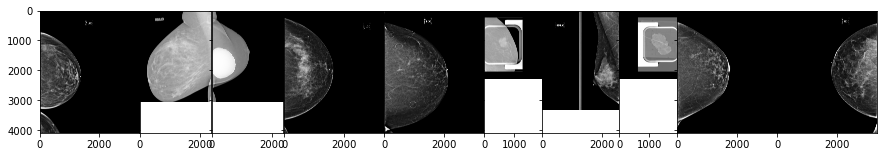

In [167]:
ALGORITHM = 'IForest'



from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(15., 60.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, len(all_evals[ALGORITHM]['pred_indices'][0])),  
                 axes_pad=0.01,  
                 )
for i,ax in enumerate(grid):

    indexxx = all_evals[ALGORITHM]['pred_indices'][0][i]
    ax.imshow(all_images[indexxx], cmap='gray')

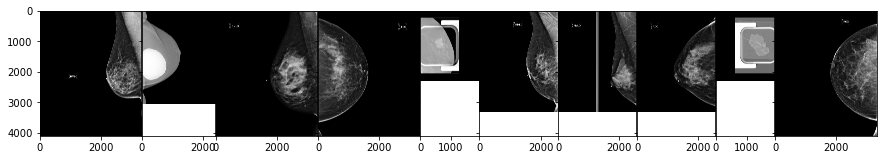

In [177]:
ALGORITHM = 'HBOS'



from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(15., 60.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, len(all_evals[ALGORITHM]['pred_indices'][0])),  
                 axes_pad=0.01,  
                 )
for i,ax in enumerate(grid):

    indexxx = all_evals[ALGORITHM]['pred_indices'][0][i]
    ax.imshow(all_images[indexxx], cmap='gray')

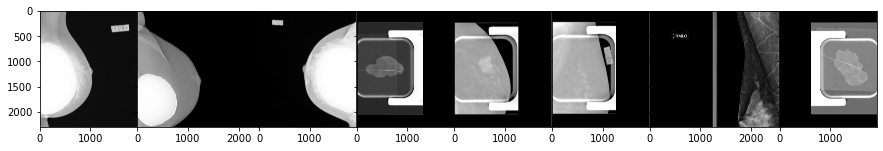

In [168]:
fig = plt.figure(figsize=(15., 60.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, len(all_evals[ALGORITHM]['groundtruth_indices'][0])),  
                 axes_pad=0.01,  
                 )
for i,ax in enumerate(grid):

    indexxx = all_evals[ALGORITHM]['groundtruth_indices'][0][i]
    ax.imshow(all_images[indexxx], cmap='gray')